In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
gender_submission=pd.read_csv("gender_submission.csv")

In [ ]:
print("train.csv:",train.columns,end="\n\n\n")
print("test.csv:",test.columns,end="\n\n\n")
print("gender_submission.csv:",gender_submission.columns,)

train.csv: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


test.csv: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


gender_submission.csv: Index(['PassengerId', 'Survived'], dtype='object')


In [71]:
a=train.get(['Pclass','Sex','Survived'])
table=a.groupby(['Pclass','Sex'])['Survived'].sum().unstack()
sex=a.groupby(['Sex']).aggregate(survived=('Survived','sum'))
pclass=a.groupby(['Pclass']).aggregate(survived=('Survived','sum'))
print(table,end='\n\n\n')
print(sex,end='\n\n\n')
print(pclass)

Sex     female  male
Pclass              
1           91    45
2           70    17
3           72    47


        survived
Sex             
female       233
male         109


        survived
Pclass          
1            136
2             87
3            119


<Axes: xlabel='Pclass', ylabel='Survived'>

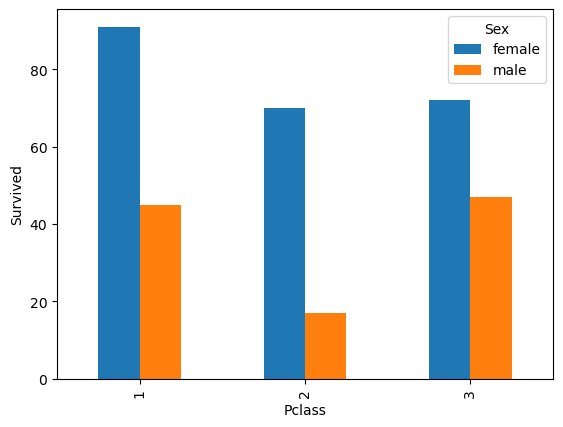

In [63]:
table.plot(kind='bar',xlabel='Pclass',ylabel='Survived')

In [64]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [99]:
def gendertoint(gender):
    if(gender=='male'):
        return int(1)
    else:
        return int(0)
def booltoint(gender):
    if(gender==1):
        return  'male'
    else:
       return 'female';

In [ ]:
data=train.get(['Sex','Pclass','Survived'])
independent_variables=data.get(['Sex','Pclass'])
independent_variables['Sex']=independent_variables['Sex'].apply(gendertoint) #selfdefined function
dependent_variables=data.get(['Survived'])

C:\Users\Raedo\AppData\Local\Temp\ipykernel_29704\2886464006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  independent_variables['Sex']=independent_variables['Sex'].apply(gendertoint) #selfdefined function


In [105]:
model=LogisticRegression()
model.fit(independent_variables,dependent_variables)

c:\Users\Raedo\Documents\dev\compilers\anaconda\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [117]:
test_x=test.get(['Sex','Pclass'])
test_x['Sex']=test_x['Sex'].apply(gendertoint)
test_y_actual=gender_submission['Survived'].to_numpy()
test_y_predicted=model.predict(test_x)

C:\Users\Raedo\AppData\Local\Temp\ipykernel_29704\4244617135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_x['Sex']=test_x['Sex'].apply(gendertoint)


In [121]:
matches=0;
total=0;
for i in range(len(test_y_actual)):
    if(test_y_actual[i]==test_y_predicted[i]):
        matches+=1
    total+=1
print("Accuracy:",matches/total*100,"%")

Accuracy: 100.0 %


In [129]:
submission=pd.DataFrame()
submission['PassengerId']=test['PassengerId']
submission['Survived']=test_y_predicted
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [130]:
submission.to_csv("mySubmission.csv",index=False)